<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas
!pip install numpy

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-12-26 15:52:27--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  60.6MB/s    in 2.5s    

2025-12-26 15:52:29 (60.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


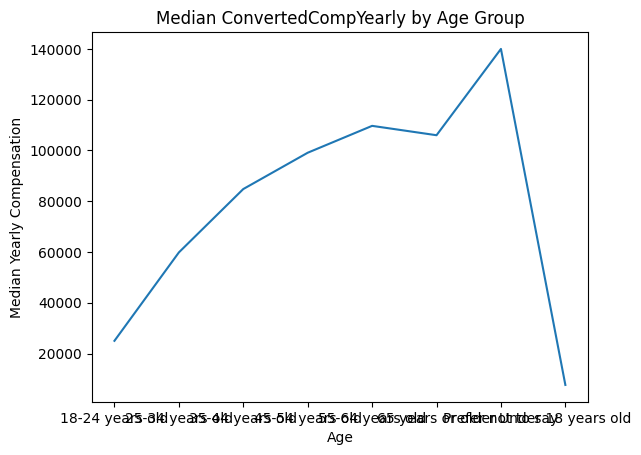

In [10]:
## Write your code here
# Remove rows with missing values in relevant columns
df_clean = df[['Age', 'ConvertedCompYearly']].dropna()

# Group by age and calculate median compensation
median_comp_by_age = (
    df_clean
    .groupby('Age')['ConvertedCompYearly']
    .median()
    .reset_index()
    .sort_values('Age')
)

# Plot the line chart
plt.figure()
plt.plot(median_comp_by_age['Age'], median_comp_by_age['ConvertedCompYearly'])
plt.xlabel('Age')
plt.ylabel('Median Yearly Compensation')
plt.title('Median ConvertedCompYearly by Age Group')
plt.show()

# The line chart shows that median yearly compensation generally increases with age, reflecting growing experience and career progression. Compensation tends to rise steadily through mid-career age groups and then levels off or fluctuates slightly at older ages, suggesting that earnings growth slows after reaching senior career stages.

##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


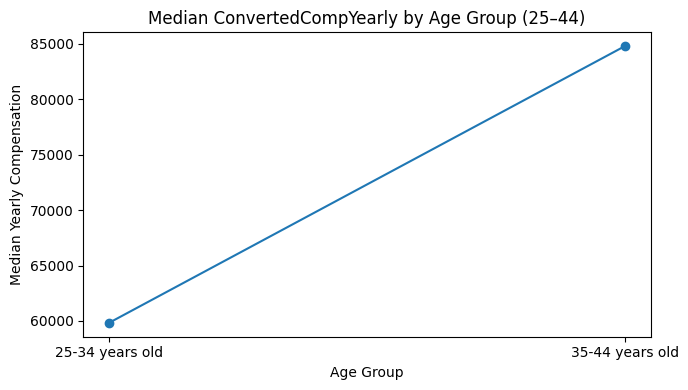

In [23]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("survey-data.csv")

# Make compensation numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Drop rows missing age or compensation
df = df.dropna(subset=['Age', 'ConvertedCompYearly'])

# Extract starting age number from Age label
df['AgeStart'] = (
    df['Age']
    .astype(str)
    .str.extract(r'(\d+)')
    .astype(float)
)

# Median compensation by age group
median_by_age = (
    df.groupby(['Age', 'AgeStart'])['ConvertedCompYearly']
      .median()
      .reset_index()
)

# Keep age groups whose range starts between 25 and 44
median_25_44 = median_by_age[
    (median_by_age['AgeStart'] >= 25) &
    (median_by_age['AgeStart'] <= 44)
].sort_values('AgeStart')

# Plot
plt.figure(figsize=(7,4))
plt.plot(
    median_25_44['Age'],
    median_25_44['ConvertedCompYearly'],
    marker='o'
)

plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation')
plt.title('Median ConvertedCompYearly by Age Group (25–44)')
plt.tight_layout()
plt.show()

# The line chart shows how median yearly compensation changes across age groups between 25 and 44. The trend generally increases from the younger to the older age group, indicating that earnings tend to rise as respondents gain experience and progress through early to mid-career stages.


### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


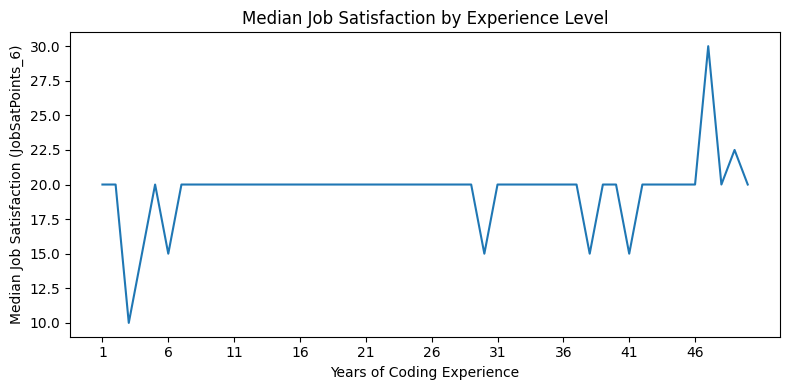

In [25]:
## Write your code here
# Convert columns to numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')

# Drop missing values
df_clean = df.dropna(subset=['YearsCode', 'JobSatPoints_6'])

# Group by experience level (years coding) and calculate median job satisfaction
median_jobsat_by_exp = (
    df_clean
    .groupby('YearsCode')['JobSatPoints_6']
    .median()
    .reset_index()
    .sort_values('YearsCode')
)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(
    median_jobsat_by_exp['YearsCode'],
    median_jobsat_by_exp['JobSatPoints_6']
)

# Clean x-axis (reduce clutter)
plt.xticks(median_jobsat_by_exp['YearsCode'][::5])

plt.xlabel('Years of Coding Experience')
plt.ylabel('Median Job Satisfaction (JobSatPoints_6)')
plt.title('Median Job Satisfaction by Experience Level')
plt.tight_layout()
plt.show()

#The line chart shows how median job satisfaction changes as years of coding experience increase. Job satisfaction tends to be lower among respondents with fewer years of experience and generally improves as experience grows, suggesting that increased familiarity, confidence, and career stability may contribute to higher satisfaction levels. Minor fluctuations indicate that satisfaction is influenced by factors beyond experience alone.


### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


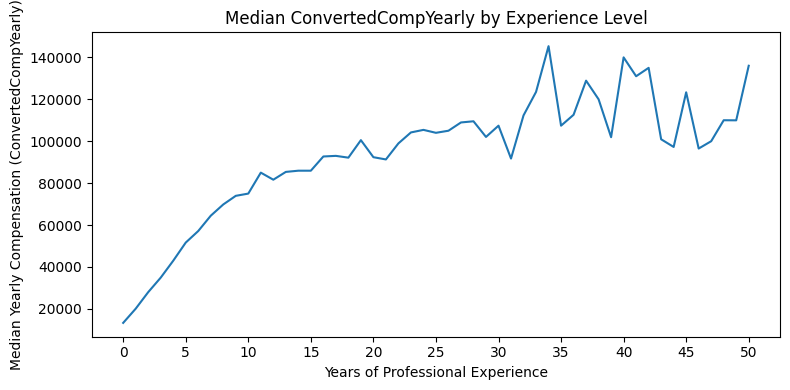

In [27]:
## Write your code here
abs# Convert columns to numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['WorkExp'] = pd.to_numeric(df['WorkExp'], errors='coerce')

# Drop missing values
df_clean = df.dropna(subset=['WorkExp', 'ConvertedCompYearly'])

# Group by experience level and calculate median compensation
median_comp_by_exp = (
    df_clean
    .groupby('WorkExp')['ConvertedCompYearly']
    .median()
    .reset_index()
    .sort_values('WorkExp')
)

# Plot line chart
plt.figure(figsize=(8, 4))
plt.plot(
    median_comp_by_exp['WorkExp'],
    median_comp_by_exp['ConvertedCompYearly']
)

# Clean x-axis (avoid overcrowding)
plt.xticks(median_comp_by_exp['WorkExp'][::5])

plt.xlabel('Years of Professional Experience')
plt.ylabel('Median Yearly Compensation (ConvertedCompYearly)')
plt.title('Median ConvertedCompYearly by Experience Level')
plt.tight_layout()
plt.show()

# The line chart shows that median yearly compensation generally increases as years of professional experience grow. Respondents with fewer years of experience earn less on average, while compensation rises steadily with additional experience, reflecting career progression and increased skill levels. Minor fluctuations suggest that factors beyond experience also influence compensation.


##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


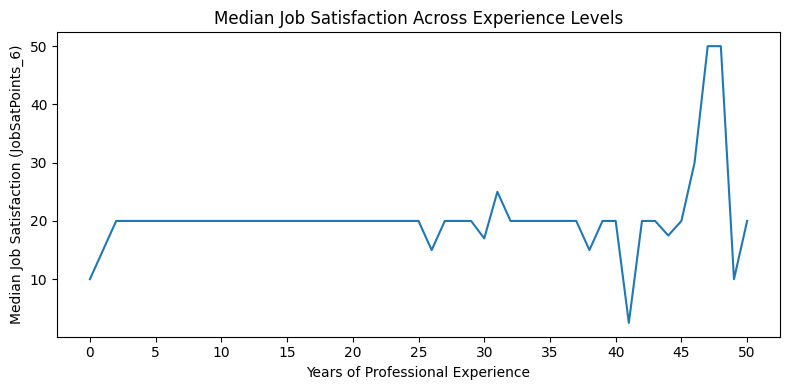

In [29]:
## Write your code here
# Convert columns to numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['WorkExp'] = pd.to_numeric(df['WorkExp'], errors='coerce')

# Drop missing values
df_clean = df.dropna(subset=['WorkExp', 'JobSatPoints_6'])

# Calculate median job satisfaction by experience level
median_jobsat_by_exp = (
    df_clean
    .groupby('WorkExp')['JobSatPoints_6']
    .median()
    .reset_index()
    .sort_values('WorkExp')
)

# Plot line chart
plt.figure(figsize=(8, 4))
plt.plot(
    median_jobsat_by_exp['WorkExp'],
    median_jobsat_by_exp['JobSatPoints_6']
)

# Clean x-axis (reduce clutter)
plt.xticks(median_jobsat_by_exp['WorkExp'][::5])

plt.xlabel('Years of Professional Experience')
plt.ylabel('Median Job Satisfaction (JobSatPoints_6)')
plt.title('Median Job Satisfaction Across Experience Levels')
plt.tight_layout()
plt.show()

# The line chart shows how median job satisfaction changes as years of professional experience increase. Job satisfaction tends to be lower at early experience levels and generally improves with additional experience, suggesting that greater familiarity, confidence, and career stability contribute to higher satisfaction. Small fluctuations indicate that experience is not the only factor influencing job satisfaction.


#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
